In [71]:
import pandas as pd
import numpy as np
import os
import datetime

pwd = os.getcwd()

med_data = pd.read_csv(pwd + "/mount_everest_deaths.csv")

In [72]:
med_data.columns

Index(['No.', 'Name', 'Date', 'Age', 'Expedition', 'Nationality',
       'Cause of death', 'Location'],
      dtype='object')

In [73]:
med_data

,No.,Name,Date,Age,Expedition,Nationality,Cause of death,Location
0,1,Dorje,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
1,2,Lhakpa,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
2,3,Norbu,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
3,4,Pasang,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
4,5,Pema,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
...,...,...,...,...,...,...,...,...
305,306,Christopher Jon Kulish,"May 27, 2019",62.0,Climbing the Seven Summits,United States,Cardiac event during descent,South Col
306,307,Puwei Liu,"May 12, 2021",55.0,Seven Summit Treks,United States,Exhaustion,Near South Summit
307,308,Abdul Waraich,"May 12, 2021",41.0,Seven Summit Treks,Switzerland,Exhaustion,Near South Summit
308,309,Pemba Tashi Sherpa,"May 18, 2021",28.0,Climbing the Seven Summits,Nepal,Fall into a crevasse,Between Camp I & Camp II


In [74]:
cause_of_death_counts = med_data.groupby("Cause of death").size()

# Map the counts to the original DataFrame
med_data["Deaths by same cause"] = med_data["Cause of death"].map(cause_of_death_counts)

top_10_causes_of_death = cause_of_death_counts.sort_values(ascending=False).head(10)

top_10_causes_of_death

Cause of death
Avalanche                                                        50
Fall                                                             46
Exposure                                                         25
Altitude sickness                                                17
Base Camp avalanche following the April 2015 Nepal earthquake    16
2014 Mount Everest Avalanche                                     15
Disappearance (likely accidental death during climb)             11
Fall into a crevasse                                             10
Exhaustion                                                        9
Crushed under serac                                               5
dtype: int64

## Avalanche is the leading cause of death. Especially when you include the 2014 and April 2015 Avalanches


In [75]:
Nationality_counts = med_data.groupby("Nationality").size().sort_values(ascending=False)

Nationality_counts

Nationality
Nepal              117
India               25
United States       20
Japan               19
United Kingdom      18
South Korea         11
China               11
Australia            8
Poland               7
Russia               7
Germany              7
France               6
Canada               6
Czechoslovakia       5
Spain                4
Austria              3
Switzerland          3
Ireland              3
Bulgaria             3
Italy                3
New Zealand          3
Taiwan               2
Czech                2
Yugoslavia           2
Hungary              2
Denmark              2
Belgium              1
Bangladesh           1
Chile                1
Brazil               1
Netherlands          1
North Macedonia      1
Slovenia             1
Slovakia             1
Sweden               1
Ukraine              1
dtype: int64

In [76]:
Expedition_counts = med_data.groupby("Expedition").size().sort_values(ascending=False).head(10)

Expedition_counts

Expedition
Adventure Consultants                                         13
International                                                 10
Japanese Expedition                                            8
1922 British Mount Everest Expedition                          7
Indian Expedition                                              7
American                                                       7
Japanese Skiing Expedition                                     7
French West Ridge Direct expedition                            6
Asian Trekking                                                 5
Polish-led expedition that included four U.S. mountaineers     5
dtype: int64

In [77]:
cleaned_age = med_data["Age"].dropna()

# Average age
average_age = cleaned_age.mean().round(1)

# Count ages above the threshold
count_above = (cleaned_age > average_age).sum()

# Count ages below the threshold
count_below = (cleaned_age <= average_age).sum()

print(f"Average Age:", average_age)
print(f"Above Average Count:", count_above)
print(f"Below Average Count:", count_below)

Average Age: 40.4
Above Average Count: 70
Below Average Count: 90


In [78]:
med_data["Date"] = pd.to_datetime(med_data["Date"], format='mixed')

# Extract the year from the datetime column
med_data["Year"] = med_data["Date"].dt.year

# Count the number of entries per year
yearly_counts = med_data["Year"].value_counts().sort_index()

# Map the counts to the original DataFrame
med_data["Deaths that same year"] = med_data["Year"].map(yearly_counts)

yearly_counts.sort_values(ascending=False).head(10)

Year
2015    17
2014    16
1996    15
2019    12
1982    11
2006    11
2012    10
1988    10
2013     9
1997     9
Name: count, dtype: int64

In [79]:
med_data

,No.,Name,Date,Age,Expedition,Nationality,Cause of death,Location,Deaths by same cause,Year,Deaths that same year
0,1,Dorje,1922-06-07,NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,50.0,1922,7
1,2,Lhakpa,1922-06-07,NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,50.0,1922,7
2,3,Norbu,1922-06-07,NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,50.0,1922,7
3,4,Pasang,1922-06-07,NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,50.0,1922,7
4,5,Pema,1922-06-07,NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,50.0,1922,7
...,...,...,...,...,...,...,...,...,...,...,...
305,306,Christopher Jon Kulish,2019-05-27,62.0,Climbing the Seven Summits,United States,Cardiac event during descent,South Col,1.0,2019,12
306,307,Puwei Liu,2021-05-12,55.0,Seven Summit Treks,United States,Exhaustion,Near South Summit,9.0,2021,4
307,308,Abdul Waraich,2021-05-12,41.0,Seven Summit Treks,Switzerland,Exhaustion,Near South Summit,9.0,2021,4
308,309,Pemba Tashi Sherpa,2021-05-18,28.0,Climbing the Seven Summits,Nepal,Fall into a crevasse,Between Camp I & Camp II,10.0,2021,4


In [80]:
Location_counts = med_data.groupby("Location").size().sort_values(ascending=False).head(20)

Location_counts

Location
Icefall              36
Base Camp            23
N.E. Ridge           19
Below North Col      13
8600m N.E. Ridge      8
6400m                 7
South Col             7
Near Summit           7
Balcony               5
8700m N.E. Ridge      5
5900m Icefall         4
8500m N.E. Ridge      4
8400m S.E. Ridge      4
8000m S.W. Ridge      4
Camp II               4
7200m W ridge         4
7400m Lhotse Face     3
7800m N.E. Ridge      3
8300m N.E. Ridge      3
North Col             3
dtype: int64

## I have to assume the Icefall is refuring to the dangerous section on everest called the 'Khumbu Icefall'


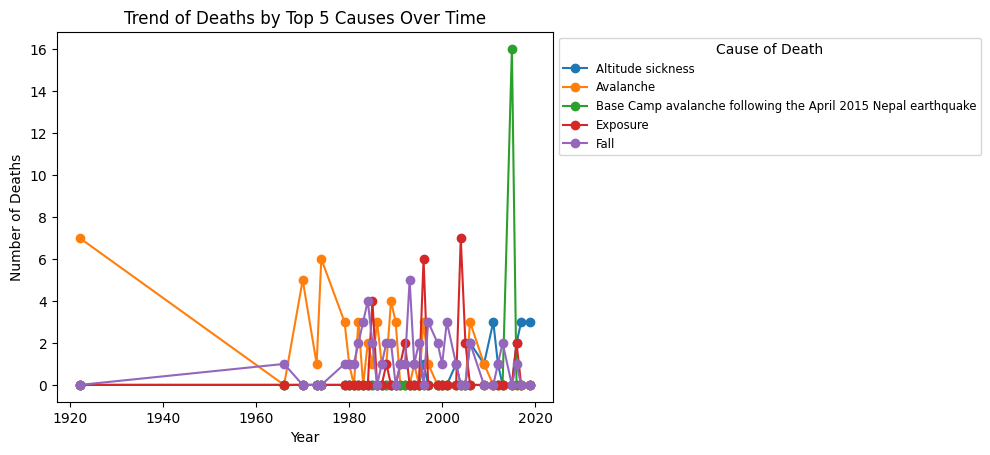

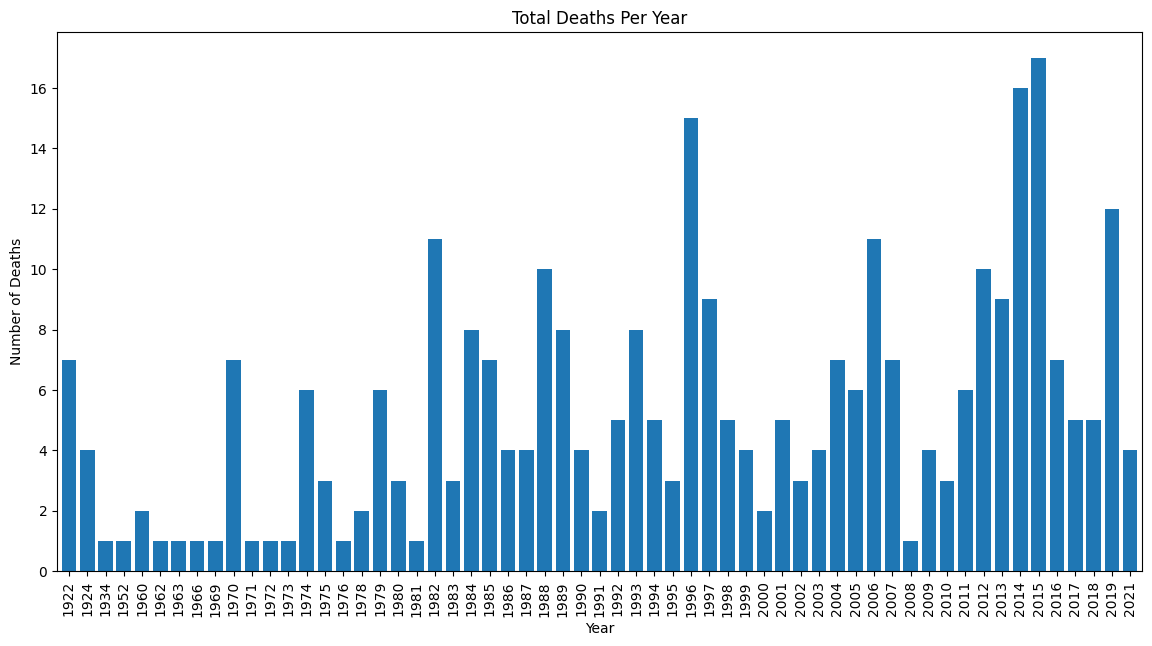

In [81]:
import matplotlib.pyplot as plt

# top 5 causes of death
top_5_causes_of_death = cause_of_death_counts.sort_values(ascending=False).head(5).index

top_5_data = med_data[med_data["Cause of death"].isin(top_5_causes_of_death)]

cause_death_trend = top_5_data.groupby(["Year", "Cause of death"]).size().unstack().fillna(0)
ax = cause_death_trend.plot(kind='line', marker='o')

# title and labels
plt.title('Trend of Deaths by Top 5 Causes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')

plt.legend(title='Cause of Death', fontsize='small', loc='best', bbox_to_anchor=(1, 1))

plt.show()



# Deaths per year
deaths_per_year = med_data.groupby('Year').size()

# Create bar plot 
plt.figure(figsize=(14, 7))
deaths_per_year.plot(kind='bar', width=0.8)

# title and labels
plt.title('Total Deaths Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


In [82]:
med_data.to_csv(pwd + "/Output.csv")

## Deaths have continued to get worse overtime since more and more people are treating it as a tourist activity